In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler,LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('Walmart_Sales.csv')
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [69]:
df.drop(['Date'],axis=1,inplace=True)

In [70]:
df.sample()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4235,30,410711.99,0,69.79,3.274,217.004826,7.441


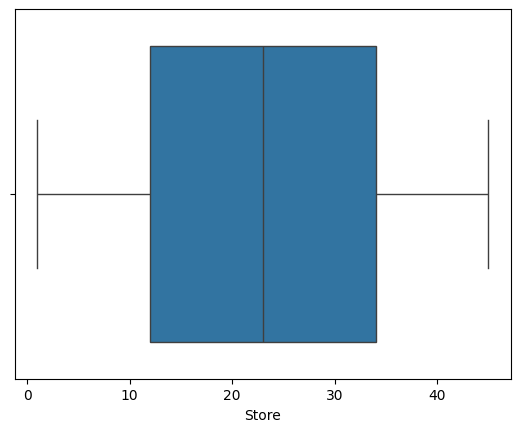

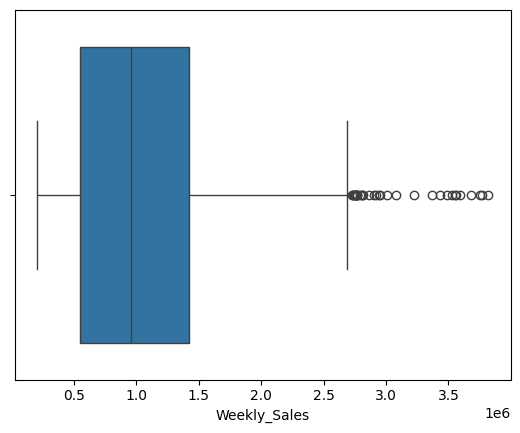

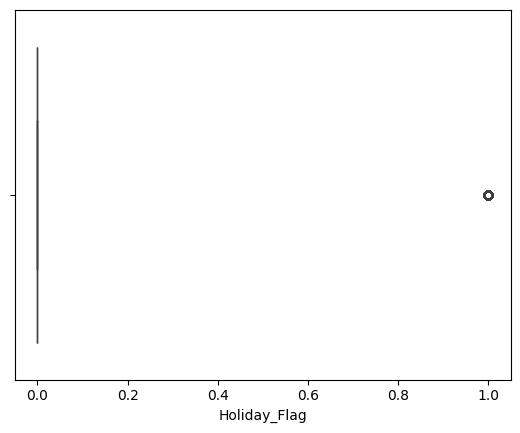

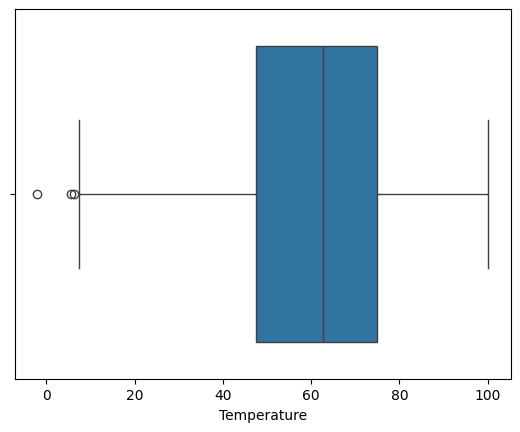

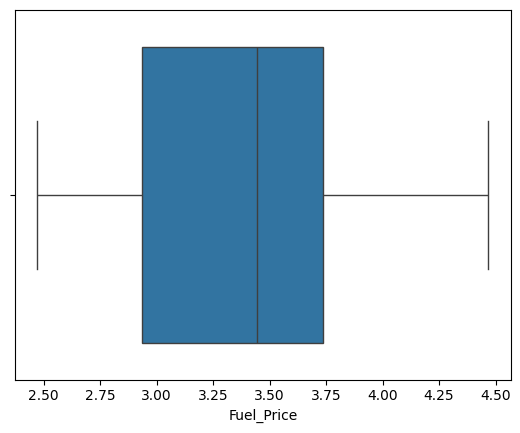

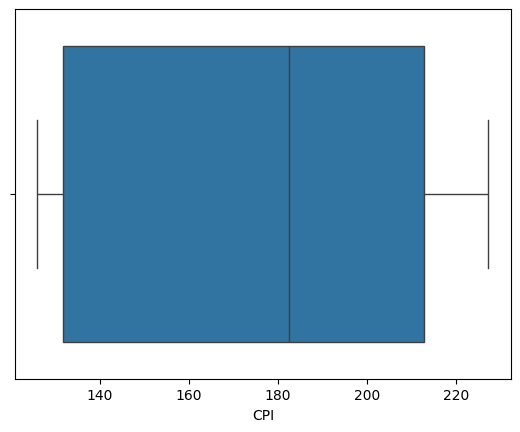

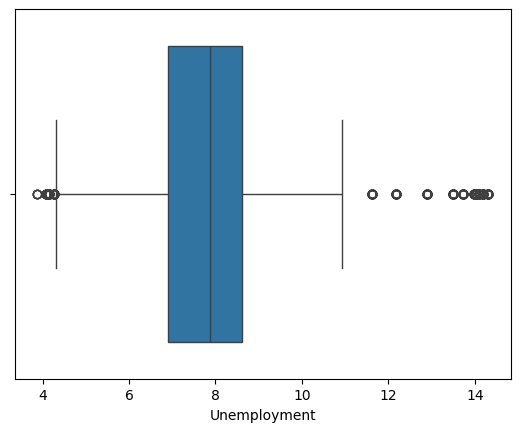

In [71]:
features=['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']
for i in features:
    sns.boxplot(x=df[i])
    plt.show()

In [72]:
df.skew()

,0
Store,0.000000
Weekly_Sales,0.668362
Holiday_Flag,3.373499
Temperature,-0.336768
Fuel_Price,-0.096158
CPI,0.063492
Unemployment,1.188144


In [73]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to each column (optional loop)
for col in df.columns:
    df = remove_outliers_iqr(df, col)

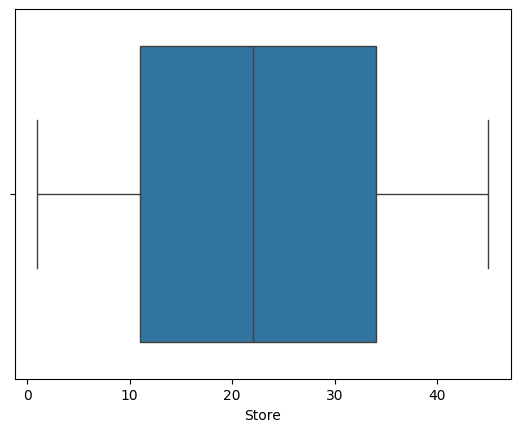

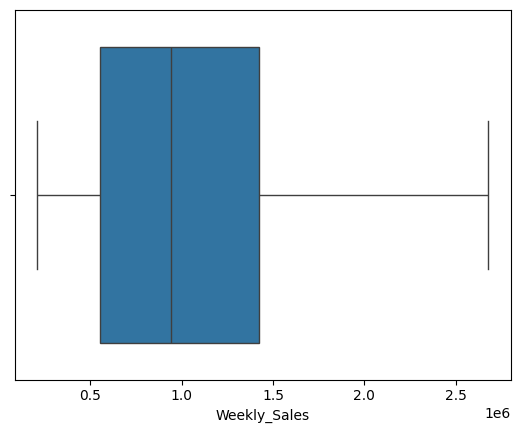

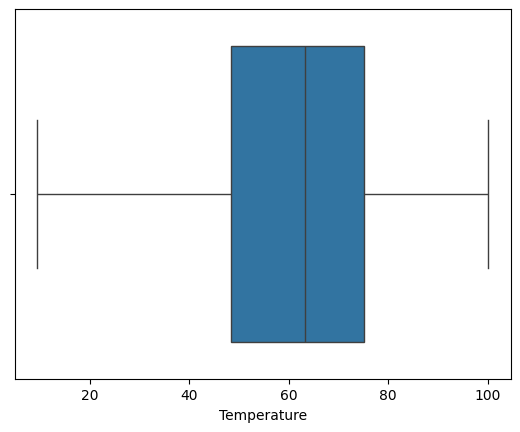

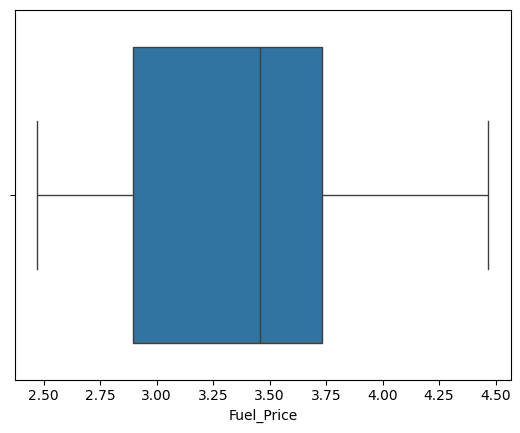

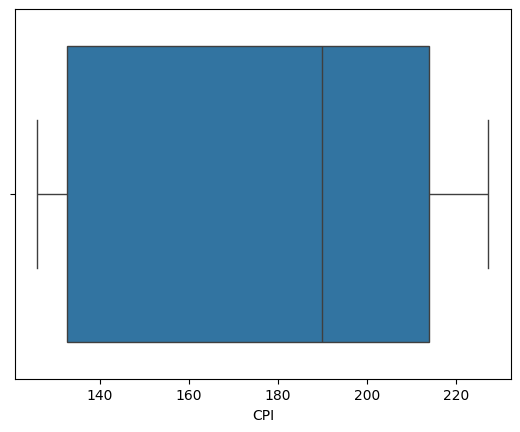

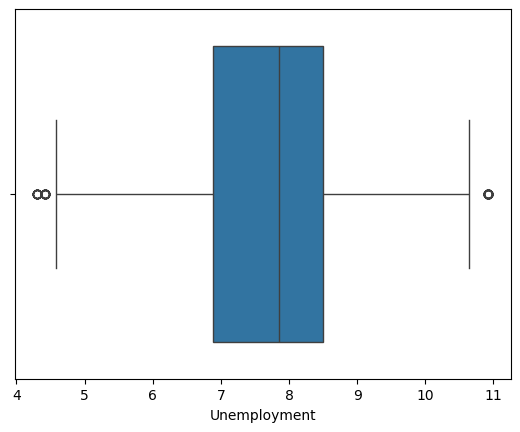

In [74]:
features=['Store', 'Weekly_Sales',  'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']
for i in features:
    sns.boxplot(x=df[i])
    plt.show()

In [75]:
df.skew()

,0
Store,0.026277
Weekly_Sales,0.499577
Holiday_Flag,0.000000
Temperature,-0.375468
Fuel_Price,-0.111502
CPI,-0.091050
Unemployment,-0.096362


In [76]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [77]:
df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].sample(10)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
3720,1945070.33,32.44,2.909,135.465778,8.237
6083,533917.52,83.43,3.682,207.313553,10.641
4597,267495.76,97.66,2.978,126.139200,9.495
1983,1660228.88,74.22,3.564,191.064610,8.567
314,351728.21,88.02,2.664,214.931419,7.346
6001,505978.46,82.52,3.966,131.043000,7.170
118,1611096.05,73.77,3.688,221.725663,7.143
3675,971557.62,22.94,3.439,136.698129,7.467
5025,434879.87,84.14,2.601,210.097523,8.464
4816,1151052.86,32.31,3.149,129.898065,10.148


In [78]:
features = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)
print(scaled_df.head())


   Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
0      1.106914    -1.052932   -1.691341  0.924110       0.31155
1      1.049157    -1.185377   -1.817407  0.929048       0.31155
2      0.680941    -0.812526   -1.715250  0.929830       0.31155
3      0.945084    -0.819761   -1.576143  0.930611       0.31155
4      0.735222    -0.191479   -1.484854  0.931392       0.31155


In [79]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Step 1: Encode
le_store = OneHotEncoder(sparse_output=False)
le_holiday = OneHotEncoder(sparse_output=False)

encoded_store = le_store.fit_transform(df[['Store']])
encoded_holiday = le_holiday.fit_transform(df[['Holiday_Flag']])

# Step 2: Convert to DataFrames with proper column names
store_df = pd.DataFrame(encoded_store, columns=le_store.get_feature_names_out(['Store']))
holiday_df = pd.DataFrame(encoded_holiday, columns=le_holiday.get_feature_names_out(['Holiday_Flag']))

# Step 3: Concatenate all into one final DataFrame
scaled_df = pd.concat([scaled_df.reset_index(drop=True), store_df, holiday_df], axis=1)

# Optional: Display the result
print(scaled_df.columns)


Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6',
       'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12',
       'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18',
       'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24',
       'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30',
       'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36',
       'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42',
       'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0'],
      dtype='object')


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X=scaled_df[['Temperature', 'Fuel_Price', 'CPI', 'Store_1','Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7','Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13','Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19','Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25','Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31','Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37','Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43','Store_44', 'Store_45', 'Holiday_Flag_0']]
y=scaled_df['Weekly_Sales']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [82]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [83]:
y_pred = model.predict(X_test)


In [85]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# R² Score
r2 = r2_score(y_test, y_pred)

# Custom Accuracy: Percentage based on error
custom_accuracy = 100 - np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.06
R² Score: 0.94
